In [24]:
import os, json
import numpy as np

from vscworkflows.tools.optics import SolarCell, EMRadSpectrum
from scipy.io import loadmat

import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True)
import tikzplotlib

figures_dir = "../../figures/slme"

color0 = "#B81F1F"

## Si analysis

In [25]:
data = loadmat("data/Si_Analysis.mat")

In [26]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'J_0', 'J_sc', 'Jmax', 'S', 'Vmax', 'Voc', 'absCoeff', 'alpha', 'ans', 'data', 'energy', 'grid', 'lambda'])

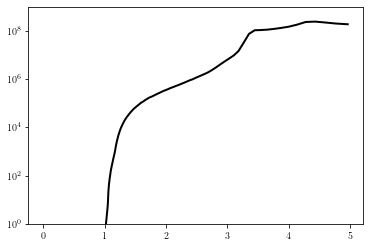

In [27]:
plt.plot(data["energy"][0], data["absCoeff"][0], "k", linewidth=2)
plt.yscale("log")
plt.ylim([1, 1e9]);
tikzplotlib.save(filepath=os.path.join(figures_dir, "si_abs_data.tex"), 
                 add_axis_environment=False)

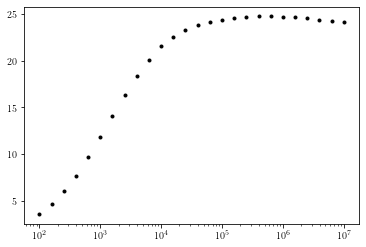

In [28]:
plt.plot(data["grid"][0] * 1e9, data["S"][0], "ko", markersize=3)
plt.xscale("log")
tikzplotlib.save(filepath=os.path.join(figures_dir, "si_slme_data.tex"), 
                 add_axis_environment=False)

## Solar Spectrum

In [29]:
solar = EMRadSpectrum.get_solar_spectrum()

In [30]:
from scipy import constants

figures_dir = "../../figures/defence"

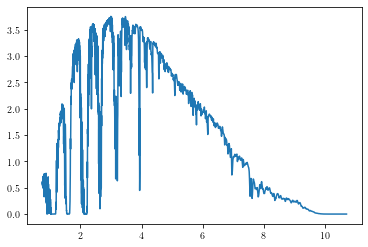

In [36]:
plt.plot(solar.energy / constants.h * constants.e / 1e14, solar.energy * solar.photon_flux / 1e21)
# plt.xscale("log")
# plt.plot([430e12, 430e12], [0, 1e21])
# plt.plot([770e12, 770e12], [0, 1e21])

tikzplotlib.save(filepath=os.path.join(figures_dir, "solar-data.tex"), 
                 add_axis_environment=False)

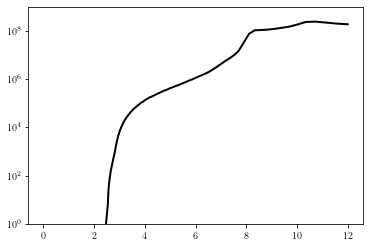

In [35]:
plt.plot(data["energy"][0] / constants.h * constants.e / 1e14, data["absCoeff"][0], "k", linewidth=2)
# plt.xscale("log")
plt.yscale("log")
plt.ylim([1, 1e9]);
tikzplotlib.save(filepath=os.path.join(figures_dir, "si_abs_data.tex"), 
                 add_axis_environment=False)

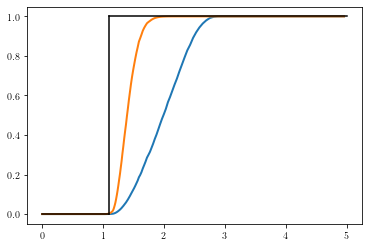

In [44]:
plt.plot(data["energy"][0], 
         1.0 - np.exp(-2.0 * data["absCoeff"][0] * 1e-6), linewidth=2)

plt.plot(data["energy"][0], 
         1.0 - np.exp(-2.0 * data["absCoeff"][0] * 10e-6), linewidth=2)


plt.plot([0, 1.1], [0, 0], "k")
plt.plot([1.1, 1.1], [0, 1], "k")
plt.plot([1.1, 5], [1, 1], "k")

tikzplotlib.save(filepath=os.path.join(figures_dir, "si_absorb_data.tex"), 
                 add_axis_environment=False)

In [45]:
1e15 * constants.h / constants.e

4.135667696923859